## Исследование продаж компьютерных игр

Описание проекта

Имеются данные о продаже игр в различных регионах до 2016 г.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) в различных регионах до 2016 года. В проекте нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Цель проекта: анализ рынка игр и платформ в Европе, Северной Америке и Японии.

### Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st
from IPython.display import display

In [2]:
#games = pd.read_csv('/Users/Mikalai/Documents/Data Science/Prefab project_1/games.csv')
games = pd.read_csv('/datasets/games.csv')

##### 1.1 Изучаем общую информацию о данных

In [3]:
display(games.columns) # название колонок
display(games.head(10)) # структуру таблицы
display(games.describe()) # разброс значений, среднее и медиана 
display(games.info()) # состав таблицы, формат столбцов, наличие пропусков
display(games.isnull().sum()) # наличие нулевых обьектов
display(games.isna().sum())# наличие пропусков
display(games.duplicated().sum()) # наличие дубликатов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

0

##### Выводы

Первое знакомство с данными показывает, что в таблице 16715 строк и 11 столбцов.

Дубликатов не обнаружено. Данные соответствуют описанию. 

Имееются нарушения стиля в названиях столбцов.

Изучена общая информация таблицы.

В таблице присутствуют данные с 1980 до 2016 года. 

Требуется в некоторых столбцах изменить тип данных:
- тип данных в столбце Year_of_Release надо заменить на int64, так как года пишут всегда целым числом;
- тип данных в столбце User_Score надо заменить на float.

Плафтформы и жанры заполнены на первый взгляд корректно. Много пропущенных данных в столбцах c оценками и рейтингом Critic_Score, User_Score и Rating. Пропуски надо исследовать и обработать далее в первую очередь. Необходимо также дальнейшее исследование данных для поиска скрытых ошибок и выбросов.

### Шаг 2. Подготовка данных

##### 2.1 Замена названия столбцов (приведение к нижнему регистру)

In [4]:
games = (games.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 
                        'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 
                        'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}))
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

##### 2.2 Подготовка данных в столбце name

In [5]:
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [6]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Тип данных object в столбце для названия игр name соотетствует хранящейся информации.

Найдём пропущенные данные.

In [7]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные пропущены только в 2 записях. Без названия игры эти записи нам не интересны. В этих записях также отсутствуют даннные и в других столбцах. Две записи можно удалить без ущерба распределениям по другим параметрам.

In [8]:
games = games.dropna(subset=['name'])
display(games.isna().sum())# наличие пропусков

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Строки с пропущенными данными в столбце name удалены

##### 2.3 Подготовка данных в столбце platform

In [9]:
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Тип данных object в столбце platform соответствует хранящейся информации.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.4 Подготовка данных в столбце year_of_release

In [10]:
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Тип данных float64 в столбце year_of_release надо заменить на int64, так как года пишут всегда целым числом.

Но сначала обработаем пропущенные данные.

In [11]:
print(f'Пропущено значений в столбце year_of_release = {(len(games) - games.year_of_release.count())/len(games):,.2%}')

Пропущено значений в столбце year_of_release = 1.61%


In [12]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенных значений в столбце year_of_release  не много 1.61%. 

В данных с пропущенными значениями столбца year_of_release ничего общего нет. 

Данные могли быть утеряны в результате сбоя при загрузке данных в базу. Данные невозможно восстановить на основе имеющейся информации. Пропущенных значений не много и эти данные не являются самыми важными для анализа. Удаляем данные с пропущенными значениями.

In [13]:
games = games.loc[~games['year_of_release'].isna()]
display(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Тип данных float64 в столбце year_of_release заменим на int64

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int')
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### 2.5 Подготовка данных в столбце genre

In [15]:
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

Тип данных object в столбце genre соотетствует хранящейся информации.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.6 Подготовка данных в столбце na_sales

In [16]:
display(games.head(10))
display(games.info())
games['na_sales'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Тип данных float64 в столбце na_sales соотетствует хранящейся информации - миллионы проданных копий игр в Северной Америке.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.7 Подготовка данных в столбце eu_sales

In [17]:
display(games.head(10))
display(games.info())
games['eu_sales'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Тип данных float64 в столбце eu_sales соотетствует хранящейся информации - миллионы проданных копий игр в Европе.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.8 Подготовка данных в столбце jp_sales

In [18]:
display(games.head(10))
display(games.info())
games['jp_sales'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Тип данных float64 в столбце jp_sales соотетствует хранящейся информации - миллионы проданных копий игр в Японии.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.9 Подготовка данных в столбце other_sales

In [19]:
display(games.head(10))
display(games.info())
games['critic_score'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Тип данных float64 в столбце other_sales соотетствует хранящейся информации - миллионы проданных копий игр в других странах.

Пропущенных данных нет.

Дополнительной подготовки данных не требуется.

##### 2.10 Подготовка данных в столбце critic_score

In [20]:
display(games.head(10))
display(games.info())
games['other_sales'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Тип данных float64 в столбце critic_score соотетствует хранящейся информации.

Имеется много пропусков данных.

In [21]:
print(f'Пропущено значений в столбце critic_score = {(len(games) - games.critic_score.count())/len(games):,.2%}')

Пропущено значений в столбце critic_score = 51.45%


In [22]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенных значений в столбце оценка критиков critic_score боее половины 51.31%.

В данных с пропущенными значениями столбца critic_score ничего общего нет.

Воможно пропуски в столбце оценка критиков critic_score из-за того, что игры не оценивались критиками. В данном случае неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Однако, чтобы иметь возможность быстрой фильтрации данных и обработки, пропуски заполним отрицательным рейтингом, например -0.1. Минимальный отрицательный рейтинг -0.1 не должен оказать существенное влияние на результат при обработке данных. Нулевым рейтингом пропущенные значения заполнить нельзя, так как в данных имеется реальный нулевой рейтинг. 

In [23]:
games['critic_score'] = games['critic_score'].fillna(-0.1)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,NaN,NaN


In [24]:
display(games['critic_score'].isna().sum())

0

Пропуски в столбце critic_score заполнены

##### 2.11 Подготовка данных в столбце user_score

In [25]:
display(games.head(10))
display(games.info())
games['user_score'].describe()
print(f'Пропущено значений в столбце user_score = {(len(games) - games.user_score.count())/len(games):,.2%}')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-0.1,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-0.1,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


None

Пропущено значений в столбце user_score = 40.17%


In [26]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Тип данных object в столбце user_score надо заменить на float.

Пропущенных значений много 40.08%. Воможно пропуски в столбце оценка критиков critic_score из-за того, оценки пользователей не собирались.

Но в первую очередь надо разбираться со значением в столбце "tbd".

Сокращение tbd = to be determined,т.е. "будет определено". Это тоже пропуски значений.

Сначала определим количество таких пропусков и есть закономерность в пропусках.

In [27]:
games[games['user_score'] == 'tbd']['user_score'].count()

2376

In [28]:
display(games[games['user_score']=="tbd"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-0.1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-0.1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-0.1,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-0.1,tbd,E


Значений таких "tbd" много  2424. Однако закономерности появлениях "tbd" не прослеживается. Поэтому заменим их на NaN и после этого обработаем пропуски.

In [29]:
games['user_score'].isna().sum()

6605

In [30]:
games.loc[games['user_score']=="tbd", 'user_score']=np.nan

In [31]:
games['user_score'].isna().sum()

8981

In [32]:
print(f'Пропущено значений в столбце user_score = {(len(games) - games.user_score.count())/len(games):,.2%}')

Пропущено значений в столбце user_score = 54.62%


Пропуски в столбце оценка пользователей user_score заполним как в столбце  critic_score минимальным отрицательным значением -0.1. Нулевой оценкой пропущенные значения заполнить нельзя, так как в данных имеется реальная нулевая оценка пользователей.

И тип данных в столбце user_score заменим на float.

In [33]:
games['user_score'] = games['user_score'].fillna(-0.1)

In [34]:
games['user_score'] = games['user_score'].astype(float)

In [35]:
display(games.head())
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,-0.1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,-0.1,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


None

##### 2.12 Подготовка данных в столбце rating

In [36]:
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,-0.1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,-0.1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-0.1,-0.1,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-0.1,-0.1,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


None

In [37]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Тип данных object в столбце rating соотетствует хранящейся информации о рейтинге от организации ESRB.

Имеется много пропусков данных.

In [38]:
print(f'Пропущено значений в столбце rating = {(len(games) - games.rating.count())/len(games):,.2%}')

Пропущено значений в столбце rating = 40.60%


In [39]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,-0.1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,-0.1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-0.1,-0.1,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-0.1,-0.1,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-0.1,-0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-0.1,-0.1,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-0.1,-0.1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-0.1,-0.1,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-0.1,-0.1,NaN


Пропущенных значений в столбце rating много 40.47%.

В данных с пропущенными значениями столбца rating ничего общего нет. Данные пропущены для разных платформ, годов релиза и жанров игр.

Пропуски данных в столбце rating - рейтинг от ESRB - возможны по нескольким причинам. Дата основания ESRB - 16 сентябрь 1994 года. До этого времения не было такой организации, поэтому и рейтинга от ESRB не было. В более позднее время пропуски появлялись возможно при заполнении данных. Заполнить пропуски средним рейтингом игр того же жанра будет неверно, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга. 

По информации на сайте https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board ESRB устанавливается рейтинг:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Первоначально "K-A" ("Kids to Adults").
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Исходя из полученной информации следует, что:
- много игр вышли на разных платформах, и встречаются одинаковые имена. Этим можно воспользоваться для заполнения пропусков
- значение рейтинга "K-A" надо заменить на "Е"
- значение «RP» означает отсутствие рейтинга, поэтому вместо «RP» поставим «NaN», а затем заменим все «NaN» на отсутствие рейтинга «no_rating» 

Заполним пропуски по названию игр на разных платформах.
Если название игры одно и та же есть на тазных платформах, то это значит, что и возрастной рейтинг должен быть один и тот же.

In [40]:
name_rating = games.set_index("name")['rating'].dropna().to_dict()

def rat(st):
    if pd.isna(st['rating']):
        return name_rating.get(st['name'])
    return st['rating']

games['rating'] = games.apply(rat, axis=1)
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           10185 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None


Удалось заполнить 10185-9768=417 пропусков

In [41]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = np.nan
games['rating'].unique()

array(['E', None, 'M', 'T', 'E10+', 'AO', 'EC', nan], dtype=object)

In [42]:
games['rating'] = games['rating'].fillna('no_rating')
games['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

2.12 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [43]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,-0.1,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,-0.1,no_rating,31.38


In [44]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


None

##### Выводы по подготовке данных
1. Все названия столбцов приведены к нижнему регистру

2. Выполнена подготовка данных в столбце name:

- две пропущенные записи удалены без ущерба распределениям по другим параметрам 
 
3. Выполнена подготовка данных в столбце year_of_release:

- определили, что пропущенных значений в столбце year_of_release не много 1.61%. Пропущенных значений не много и эти данные не являются самыми важными для анализа. Данные с пропущенными значениями удалены; 
- тип данных float64 в столбце year_of_release заменен на int64

3. Выполнена подготовка данных в столбце critic_score:

- пропущенные значения в столбце оценка критиков critic_score (51.31%) заполнили отрицательным рейтингом "-1". Нулевым рейтингом пропущенные значения заполнить нельзя, так как в данных имеется реальный нулевой рейтинг

4. Выполнена подготовка данных в столбце user_score:

- определили, что в столбце оценка пользователей имеются значения "tbd". Выяснили, что аббревиатура 'tbd' означает to be determined, т.е. "будет определено". Это означает пропуски значений. Поэтому значения "tbd" заменили на NaN;

- далее пропущенные значения NaN в столбце оценка пользователей user_score заполнили отрицательным рейтингом "-1", так как в данных имеется реальный нулевой рейтинг

- тип данных object в столбце user_score надо заменить на float

5. Выполнена подготовка данных в столбце rating:

- выяснили вожможные причины пропуска данных в столбце rating - рейтинг от ESRB.  До появления организации ESRB (16 сентября 1994 года) не было и рейтинга от ESRB. В более позднее время пропуски появлялись возможно при заполнении данных;

- выяснили, что означают уникальные значения в столбце rating - рейтинг от ESRB:
 
«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Первоначально "K-A" ("Kids to Adults").

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

- исходя из полученной информации, выполнили замены:

значение рейтинга "K-A" заменили на "Е";

часть пропущенных значений восстановлены на основании предположения, что одинаковые названия игр на разных платформах имеют один и тот же возрастной рейтинг;

значение «RP» означает отсутствие рейтинга, поэтому вместо «RP» поставили «NaN», а затем заменили все «NaN» на отсутствие рейтинга «no_rating»

6. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец таблицы

### Шаг 3. Исследовательский анализ данных

##### 3.1 Анализ количества игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды?

In [45]:
time_release = games.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['Год', 'К-во игр']
time_release

,Год,К-во игр
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


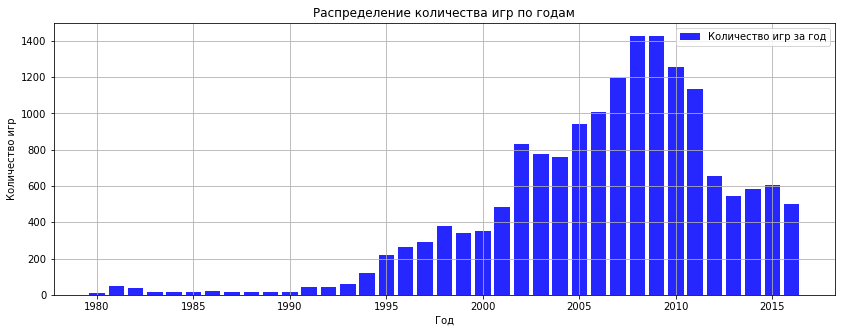

In [46]:
plt.figure(figsize=(14, 5))
plt.bar(time_release['Год'], time_release['К-во игр'], label='Количество игр за год', color='b', alpha=0.85, width=0.8)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid()
plt.title(f'Распределение количества игр по годам')
plt.legend()
plt.show()

Количество выпускаемых игр начало быстро рости с 1994 года. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик приходится на 2008-2009 года. На пике в 2008 году выпускалось 1427 игр. В последнии 5 лет выпускается около 500-650 игр в год.

##### 3.2 Анализ продаж по платформам

Выбераем платформы с наибольшими суммарными продажами

In [47]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Выбираем первые шесть платформ с максимальными количествами продаж, потому что у седьмой платформы PS4 количество продаж (314.14 млн. копий) уже сильно отличается от количества продаж у шестой платформы PS (727.58 млн. копий). Это меньше более чем в два раза.

In [48]:
platform_sales_top6 = platform_sales[platform_sales['total_sales'] >= 700]
platform_sales_top6

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [49]:
display(platform_sales_top6.head())

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Выбрали шесть платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS. Эти платформы выбрали потому, что они имеют суммарные продажи копий от двух раз и больше, чем остальные.

Построим распределение платформ с наибольшими суммарными продажами по годам

In [50]:
platforms_top6 = (games[(games['platform'] == 'PS2') | (games['platform'] == 'X360') | (games['platform'] == 'PS3') 
               | (games['platform'] == 'Wii') | (games['platform'] == 'DS') | (games['platform'] == 'PS')])
display(platforms_top6.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


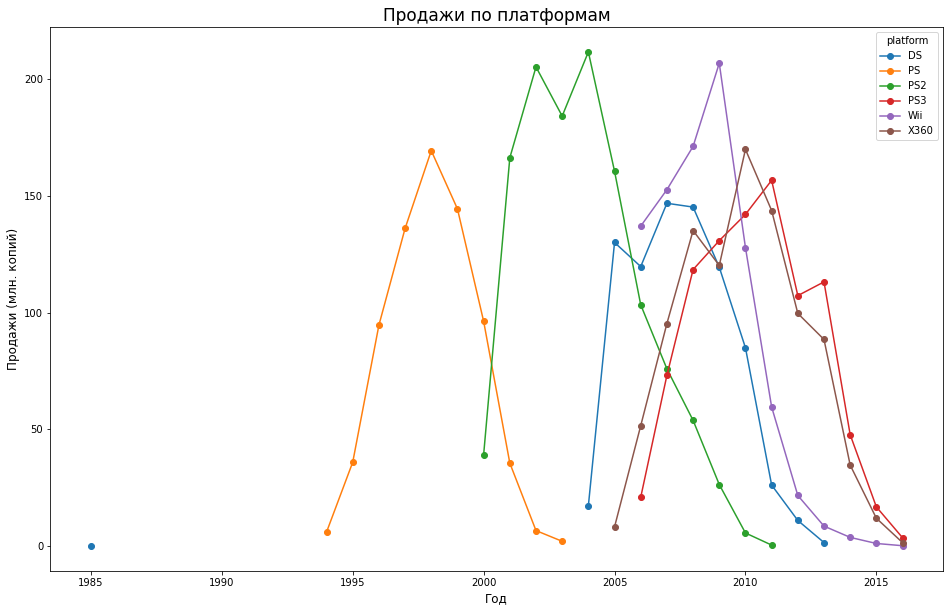

In [51]:
pd.pivot_table(platforms_top6, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', figsize=(16,10)) 
plt.title('Продажи по платформам', fontsize=17)
plt.xlabel('Год',fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.show()

Определим за какой характерный срок появляются новые и исчезают старые платформы

In [52]:
games_exist_time = games.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
display(games_exist_time['platform'].value_counts().head(10))

PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
Name: platform, dtype: int64

In [53]:
games_exist_time['platform'].value_counts().describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: platform, dtype: float64

In [54]:
games_exist_time['platform'].value_counts().mode()

0    12
dtype: int64

Наиболее частый срок, за который появляются новые и исчезают старые платформы, ориентировочно 12 лет. Среднее же значение существования платформ около 7 лет.

##### 3.3 Прогноз продаж по платформам на 2017 год 

Из анализа выше определили, что средний срок существования платформ составляет 7 лет. Однако это слишком большой период чтобы игры оставались актуальными. И распределение количества игр по годам показывает, что продажи игр идут примерно равномерно последние 5 лет. 

Поэтому для прогноза продаж по платформам на 2017 год актуальный период возьмем 5 лет с 2012 года.

In [55]:
platform_with_2012 = (games[games['year_of_release'] >= 2012])
display(platform_with_2012.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-0.1,-0.1,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-0.1,-0.1,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


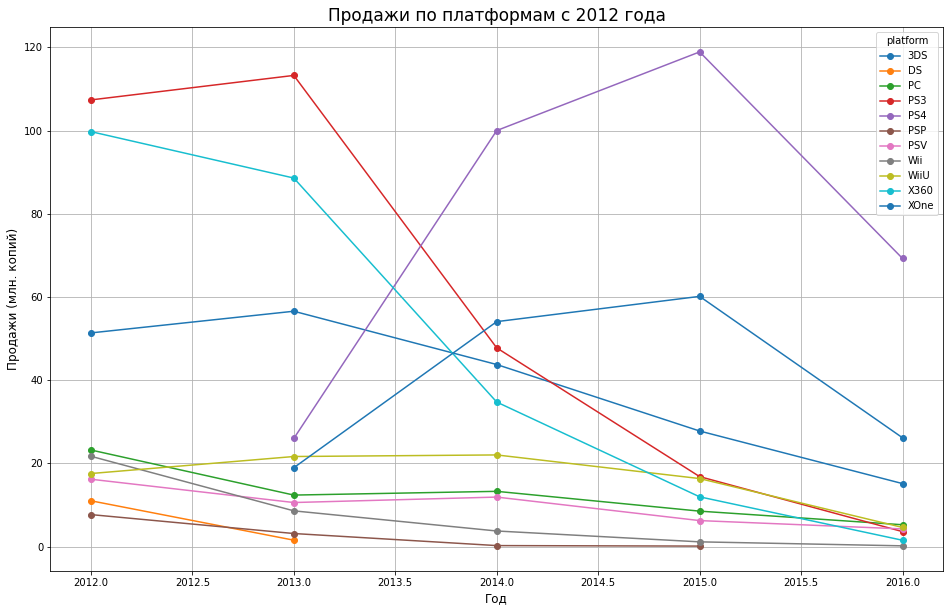

In [56]:
pd.pivot_table(platform_with_2012, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', figsize=(16,10))
plt.grid(True)
plt.title('Продажи по платформам с 2012 года', fontsize=17)
plt.xlabel('Год',fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.show()

Из графика видно, что многие популярные платформы, такие как Wii, PS3, X360 прошли свой цикл развития 12 лет. Другие платформы PS2, DS, PSP закончили свое развитие еще раньше. Во все эти платформы вкладываться не стоит.

Но есть две платформы PS4 и XOne, которые появились относительно недавно в 2013 году и до 2015 года года наблюдался рост популярности этих платформ у потребителя, а в 2016 был спад. Одновко их жизненный цикл еше не дошёл даже до середины, поэтому эти платформы необходимо развивать. На конец 2016 года это самые перспективные платформы.

Еще есть 3 платформы, которые появились пораньше: PSV, 3DS и WiiU. На конец 2016 года они находятся примерно на середине своего цикла развития. Однако с даты появления у этих платформ не наблюдалось значительного роста популярности. Эти платформы можно развивать, но вложения в эти платформы должны быть умеренными. Причем приоритет у WiiU и 3DS, так как у PSV более слабое развитие.

Необходимо обратить внимание еще на платформу PC. Она существуют уже очень долго и показывает не самую высокую, но стабильную популярность среди пользователей. От платформы PC тоже не стоит отказываться, а поддерживать ее развитие.

Найдем топ 5 прибыльных платформ по количеству проданных копий за актуальный период с 2012 года по 2016 год и, можно предположить, потенциально прибыльных на 2017 год

In [57]:
platform_with_2012_sales = platform_with_2012.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_with_2012_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [58]:
platform_with_2012_sales_top5 = platform_with_2012_sales[platform_with_2012_sales['total_sales'] >= 150]
platform_with_2012_sales_top5

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Топ 5 прибыльных платформ по количеству проданных копий за актуальный период с 2012 года по 2016 год : PS4, PS3, X360, 3DS, XOne

##### 3.4 Глобальные продажи игр в разбивке по платформам

Выбираем для построения графика топ 5 платформ за актуальный период с 2012 года по 2016 год

In [59]:
platform_with_2012_top5 = platform_with_2012[(platform_with_2012['platform'] == 'PS3') | (platform_with_2012['platform'] == 'X360') | 
                             (platform_with_2012['platform'] == 'PS4') | (platform_with_2012['platform'] == '3DS') | 
                             (platform_with_2012['platform'] == 'XOne')].reset_index()
display(platform_with_2012_top5.head())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-0.1,-0.1,no_rating,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-0.1,-0.1,no_rating,14.60
4,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Построим распределение глобальных продаж игр в разбивке по платформам с помощью метода boxplot() библиотеки seaborn()

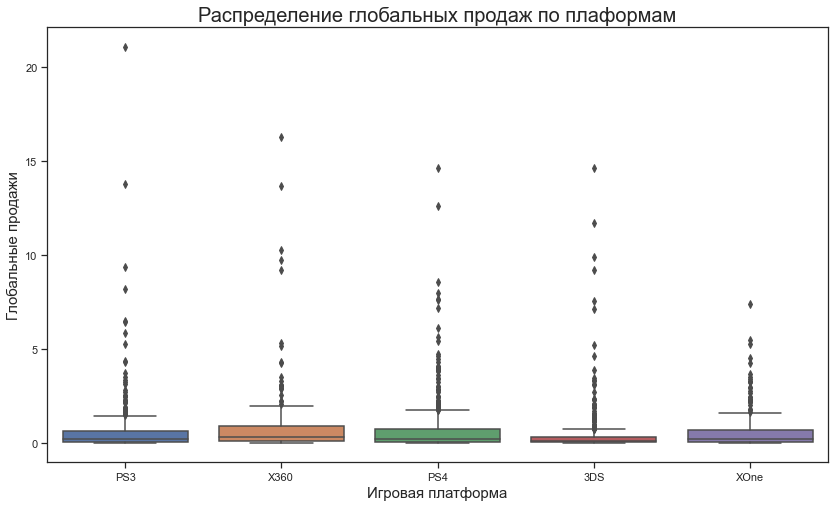

In [60]:
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=platform_with_2012_top5, y="total_sales", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
plt.show()

В данных много выбросов, которые искажают boxplot, поэтому для наглядности данные построим на логарифмиеской оси 

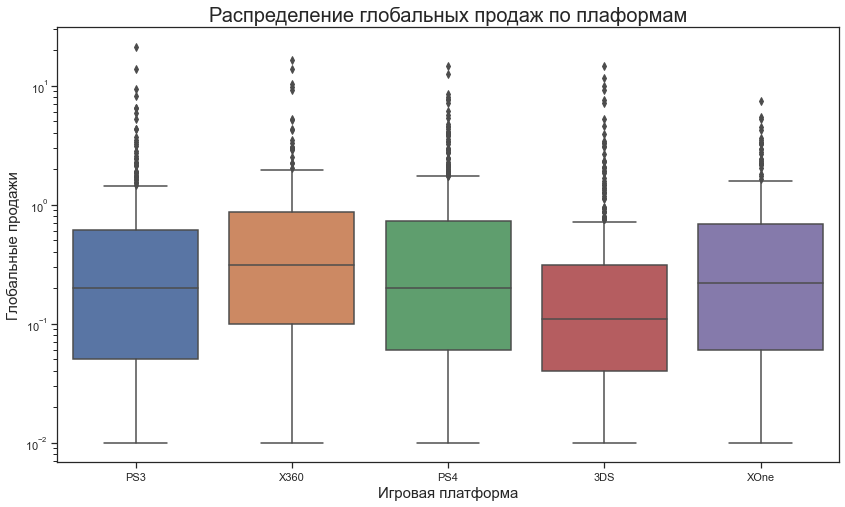

In [61]:
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=platform_with_2012_top5, y="total_sales", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale='log')
plt.show()

In [62]:
v1 = platform_with_2012_top5[platform_with_2012_top5['platform'] == 'PS3']['total_sales'].describe()
v2 = platform_with_2012_top5[platform_with_2012_top5['platform'] == 'X360']['total_sales'].describe()
v3 = platform_with_2012_top5[platform_with_2012_top5['platform'] == 'PS4']['total_sales'].describe()
v4 = platform_with_2012_top5[platform_with_2012_top5['platform'] == '3DS']['total_sales'].describe()
v5 = platform_with_2012_top5[platform_with_2012_top5['platform'] == 'XOne']['total_sales'].describe()
v1_list, v2_list, v3_list, v4_list, v5_list = [], [], [], [], []

for i in v1:
    v1_list.append(round(i,2))
for i in v2:
    v2_list.append(round(i,2))
for i in v3:
    v3_list.append(round(i,2))
for i in v4:
    v4_list.append(round(i,2))
for i in v5:
    v5_list.append(round(i,2))


stats = pd.DataFrame(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
stats.columns = ['Stats']
stats['PS3'] = v1_list
stats['X360'] = v2_list
stats['PS4'] = v3_list
stats['3DS'] = v4_list
stats['XOne'] = v5_list

stats

,Stats,PS3,X360,PS4,3DS,XOne
0,count,493.00,292.00,392.00,396.00,247.00
1,mean,0.59,0.81,0.80,0.49,0.65
2,std,1.46,1.71,1.61,1.39,1.04
3,min,0.01,0.01,0.01,0.01,0.01
4,25%,0.05,0.10,0.06,0.04,0.06
5,50%,0.20,0.31,0.20,0.11,0.22
6,75%,0.61,0.87,0.73,0.31,0.69
7,max,21.05,16.27,14.63,14.60,7.39


In [63]:
print('99-й персентиль значений total_sales на платформе PS3:', round(platform_with_2012_top5[platform_with_2012_top5['platform'] == 'PS3']['total_sales'].quantile(0.99), 1))
print('99-й персентиль значений total_sales на платформе X360:', round(platform_with_2012_top5[platform_with_2012_top5['platform'] == 'X360']['total_sales'].quantile(0.99), 1))
print('99-й персентиль значений total_sales на платформе PS4:', round(platform_with_2012_top5[platform_with_2012_top5['platform'] == 'PS4']['total_sales'].quantile(0.99), 1))
print('99-й персентиль значений total_sales на платформе 3DS:', round(platform_with_2012_top5[platform_with_2012_top5['platform'] == '3DS']['total_sales'].quantile(0.99), 1))
print('99-й персентиль значений total_sales на платформе XOne:', round(platform_with_2012_top5[platform_with_2012_top5['platform'] == 'XOne']['total_sales'].quantile(0.99), 1))

99-й персентиль значений total_sales на платформе PS3: 6.4
99-й персентиль значений total_sales на платформе X360: 9.8
99-й персентиль значений total_sales на платформе PS4: 7.7
99-й персентиль значений total_sales на платформе 3DS: 7.6
99-й персентиль значений total_sales на платформе XOne: 4.9


В данных много выбросов, медианные значения сильно отличаются от средних значений. Значения глобальных продаж по всем топ 5 платформам сильно скошены вправо. 

99% значений суммарных продаж игр на платформе X360 не превышвет 9,8 млн. копий, а максимальное значение достигает 16.27 млн. копий.

99% значений суммарных продаж игр на платформе 3DS не превышвет 7.6 млн. копий, а максимальное значение достигает 14.60 млн. копий.

99% значений суммарных продаж игр на платформе PS4 не превышвет 7,7 млн. копий, а максимальное значение достигает 14.63 млн. копий.

99% значений суммарных продаж игр на платформе PS3 не превышвет 6,4 млн. копий, а максимальное значение достигает 21.05 млн. копий.

99% значений суммарных продаж игр на платформе XOne не превышвет 4,9 млн. копий, а максимальное значение достигает 7.39 млн. копий.

Большое количество выбросов (игр с очень высоким уровнем продаж) на платформе X360 сильно увеличивают суммарные продажи на этой платформе.

Медианные значения продаж у трех платформ XOne, PS3, PS4 находятся близко к уровню 0,21 млн. копий. На платформе X360 максимальное медианное значение продаж - 0.31 млн. копий, а на платформе 3DS минимальное медианное значение продаж - 0.11 млн. копий.

##### 3.5 Анализ влияния на продажи внутри одной популярной платформы  отзывов пользователей и критиков. Соотношение продаж с другими платформами

(Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.)

Перед анализом влияния на продажи отзывов пользователей и критиков исключаем из данных строки где пропуски в столбце оценка пользователей user_score и в столбце ценка критиков critic_score заменяли отрицательным значением -0.1

In [64]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


None

In [65]:
games_clear = games.loc[games['user_score'] != -0.1]
games_clear = games_clear.loc[games['critic_score'] != -0.1]
display(games_clear.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   int32  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   float64
 9   user_score       6894 non-null   float64
 10  rating           6894 non-null   object 
 11  total_sales      6894 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 673.2+ KB


None

##### 3.5.1 Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

Выбираем для анализа одну популярную платформу из топ 5 за последние 5 лет с 2012 года

In [66]:
platform_with_2012_sales_top5

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Выбирем из топ 5 платформ за последние 5 лет одну - PS3

In [67]:
platform_ps3 = games_clear.query('platform=="PS3"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
display(platform_ps3.head(10))

,total_sales,critic_score,user_score
0,21.05,97.0,8.2
1,13.79,83.0,5.3
2,13.33,88.0,3.2
3,12.63,88.0,6.4
4,10.70,84.0,7.5
5,10.61,94.0,6.3
6,10.50,98.0,7.5
7,9.36,71.0,2.6
8,8.17,88.0,6.6
9,7.17,85.0,7.5


Посчитайтем корреляцию между отзывами и продажами

In [68]:
print(platform_ps3.corr())
print()
print('Коэффициент зависимости продаж от оценки критиков на платформе PS3 =' , platform_ps3['total_sales'].corr(platform_ps3['critic_score']))
print('Коэффициент зависимости продаж от оценки пользователей на платформе PS3 =' , platform_ps3['total_sales'].corr(platform_ps3['user_score']))

              total_sales  critic_score  user_score
total_sales      1.000000      0.428213    0.143978
critic_score     0.428213      1.000000    0.631154
user_score       0.143978      0.631154    1.000000

Коэффициент зависимости продаж от оценки критиков на платформе PS3 = 0.42821290412988283
Коэффициент зависимости продаж от оценки пользователей на платформе PS3 = 0.14397783125701552


Визуализируем матрицу корреляции с помощью heatmap библиотеки seaborn

<AxesSubplot:>

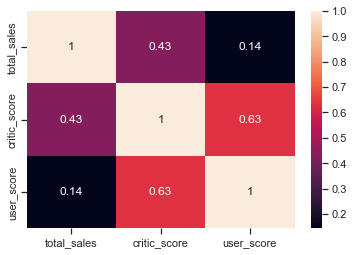

In [69]:
sns.heatmap(platform_ps3[['total_sales', 'critic_score', 'user_score']].corr(), annot=True)

Построим матрицу рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS3

Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе PS3

              total_sales  critic_score  user_score
total_sales      1.000000      0.428213    0.143978
critic_score     0.428213      1.000000    0.631154
user_score       0.143978      0.631154    1.000000

Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS3


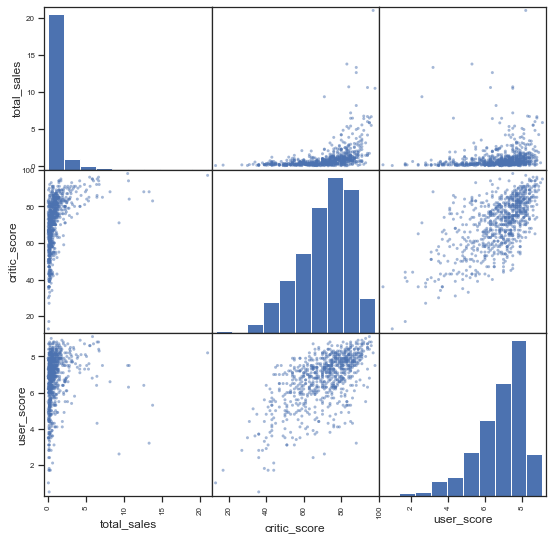

In [70]:
print('Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе PS3')
print()
print(platform_ps3.corr())
print()
print('Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS3')
pd.plotting.scatter_matrix(platform_ps3, figsize=(9, 9), grid=True);

Построим отдельно диаграммы рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS4

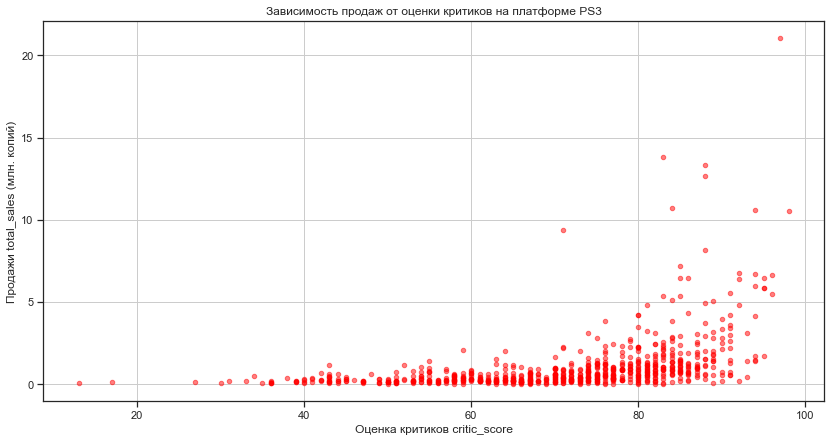

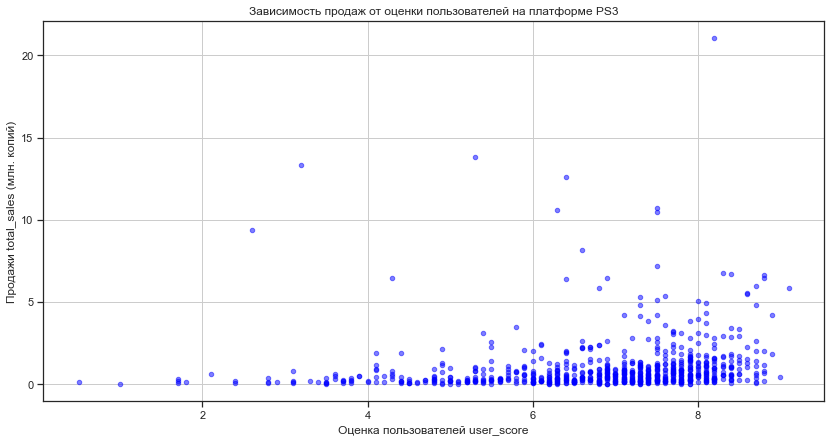

In [71]:
plot1 = platform_ps3.plot(kind = 'scatter', x='critic_score', y='total_sales', figsize=(14,7), legend=True, grid=True, 
                             alpha=0.5, title='Зависимость продаж от оценки критиков на платформе PS3', color='red')
plot2 = platform_ps3.plot(kind = 'scatter', x='user_score', y='total_sales', figsize=(14,7), legend=True, grid=True, 
                             alpha=0.5, title='Зависимость продаж от оценки пользователей на платформе PS3', color='blue')
plot1.set_xlabel('Оценка критиков critic_score'), plot1.set_ylabel('Продажи total_sales (млн. копий)')
plot2.set_xlabel('Оценка пользователей user_score'), plot2.set_ylabel('Продажи total_sales (млн. копий)')
print()

Анализ влияния на продажи внутри одной популярной платформы PS3 отзывов пользователей и критиков показал следующее. Оценки критиков важны, однако зависимость продаж от них находится на уровне средней (коэффициент корреляции 0.428). Зависимость прямопропорцианальная - чем выше оценка, тем выше продажи. Зависимость продаж от оценки пользователей слабая (коэффициент корреляции меньше - 0.1439). Зависимость также прямопропорцианальная. 

##### 3.5.2 Соотношение продаж с другими платформами

In [72]:
platform_with_2012_sales_top5

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Создадим словарь sales_score - Платформа:DataFrame (с продажами и отзывами)

In [73]:
sales_score = {}
for p in platform_with_2012_sales_top5['platform']:
    sales_score[p] = games_clear.query('platform==@p')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

Запишем в таблицу corr_top5 корелляции продаж с оценками по топ 5 платформам

In [74]:
i=0
corr_top5 = pd.DataFrame(columns=['platform','critic_score','user_score'])
for pl_name in sales_score.keys():
    corr_top5.loc[i, 'platform'] = pl_name
    corr_top5.loc[i, 'critic_score'] = sales_score[pl_name]['total_sales'].corr(sales_score[pl_name]['critic_score'])
    corr_top5.loc[i, 'user_score'] = sales_score[pl_name]['total_sales'].corr(sales_score[pl_name]['user_score'])
    i+=1

In [75]:
corr_top5

,platform,critic_score,user_score
0,PS4,0.405895,-0.033625
1,PS3,0.428213,0.143978
2,X360,0.388992,0.11028
3,3DS,0.338904,0.232089
4,XOne,0.410422,-0.094003


Построим диаграммы рассеяния зависимости продаж от оценки критиков и оценки пользователей на top 5 платформах

Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе X360

              total_sales  critic_score  user_score
total_sales      1.000000      0.388992     0.11028
critic_score     0.388992      1.000000     0.62502
user_score       0.110280      0.625020     1.00000

Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе X360


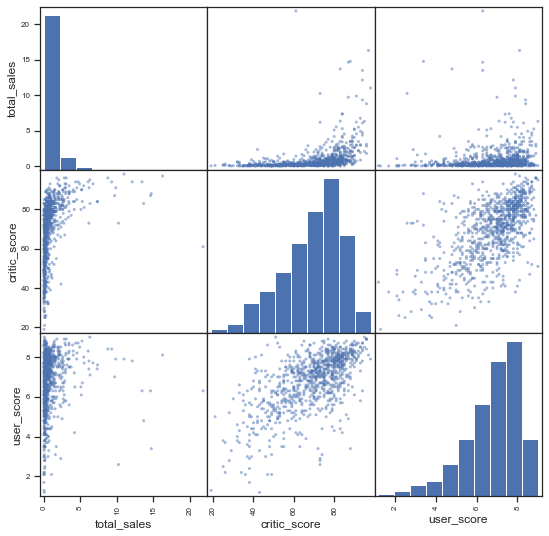

In [76]:
platform_x360 = games_clear.query('platform == "X360"')[['total_sales', 'critic_score', 'user_score']]
print('Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе X360')
print()
print(platform_x360.corr())
print()
print('Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе X360')
pd.plotting.scatter_matrix(platform_x360, figsize=(9, 9), grid=True);

Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе PS4

              total_sales  critic_score  user_score
total_sales      1.000000      0.405895   -0.033625
critic_score     0.405895      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000

Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS4


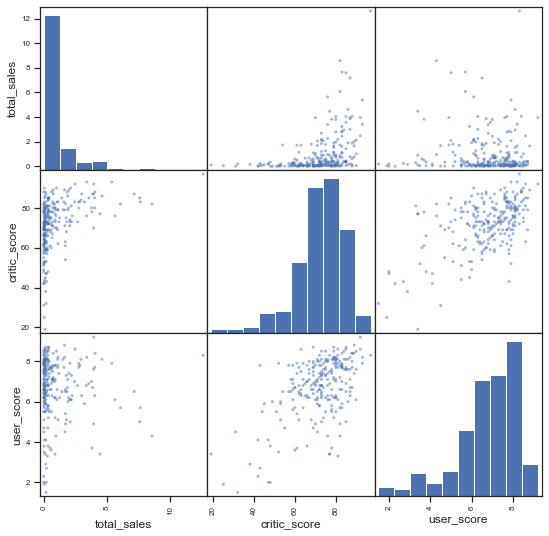

In [77]:
platform_ps4 = games_clear.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']]
print('Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе PS4')
print()
print(platform_ps4.corr())
print()
print('Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе PS4')
pd.plotting.scatter_matrix(platform_ps4, figsize=(9, 9), grid=True);

Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе 3DS

              total_sales  critic_score  user_score
total_sales      1.000000      0.338904    0.232089
critic_score     0.338904      1.000000    0.745222
user_score       0.232089      0.745222    1.000000

Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе 3DS


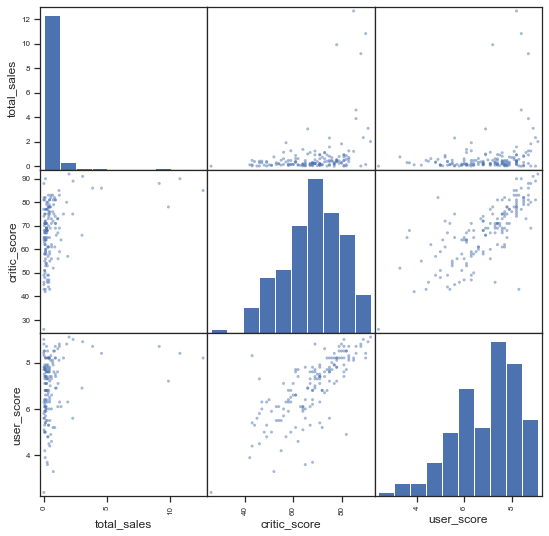

In [78]:
platform_3ds = games_clear.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']]
print('Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе 3DS')
print()
print(platform_3ds.corr())
print()
print('Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе 3DS')
pd.plotting.scatter_matrix(platform_3ds, figsize=(9, 9), grid=True);

Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе XOne

              total_sales  critic_score  user_score
total_sales      1.000000      0.410422   -0.094003
critic_score     0.410422      1.000000    0.472462
user_score      -0.094003      0.472462    1.000000

Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе XOne


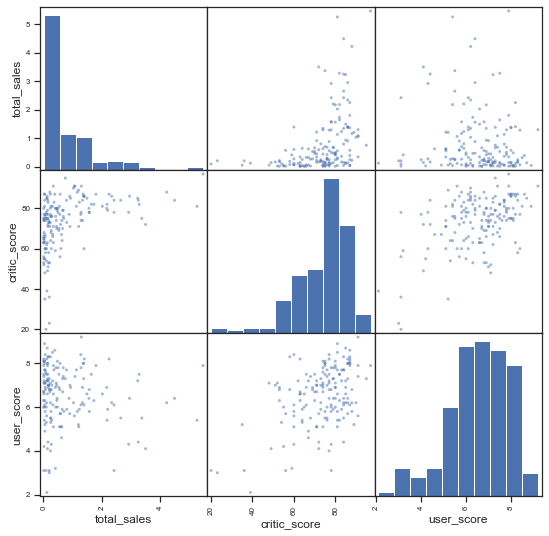

In [79]:
platform_xone = games_clear.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']]
print('Матрица корреляции зависимости продаж от оценки критиков и оценки пользователей на платформе XOne')
print()
print(platform_xone.corr())
print()
print('Матрица рассеяния зависимости продаж от оценки критиков и оценки пользователей на платформе XOne')
pd.plotting.scatter_matrix(platform_xone, figsize=(9, 9), grid=True);

Схожие тенденции зависимости продаж от оценки критиков и оценки пользователей наблюдаются как для платформы PS3 так и для остальных топ 5 платформ. Зависимость продаж от оценки критиков ближе к средней, но в разы выше чем зависимость продаж от оценки пользователей. Зависимости продаж от оценки пользователей на платформах PS4 и XOne нет. Оценка пользователей очень слабая влияют на прожажи на платформах PS3 и X360. Зависимость продаж от оценки критиков прямопропорцианальные. Зависимость продаж от оценки пользователей на платформах PS4 и XOne имеют даже минимальную отрицательную корреляцию. 

##### 3.6 Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Количество игр по жанрам

In [80]:
genres = games.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: name, dtype: int64

Чтобы найти жанр, где игры стабильно приносят высокий доход, рассмотрим средние продажи по жанрам. 

In [81]:
genre_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_sales

genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64

In [82]:
games_genre_sales_pivot = games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'mean'])
games_genre_sales_pivot.columns = ['games', 'sales_mean']
display(games_genre_sales_pivot.sort_values(by = 'sales_mean', ascending = False))

,games,sales_mean
genre,,
Platform,878,0.940262
Shooter,1296,0.803519
Role-Playing,1481,0.628683
Racing,1226,0.590122
Sports,2306,0.567940
Fighting,837,0.528865
Action,3307,0.519057
Misc,1721,0.459204
Simulation,857,0.452695


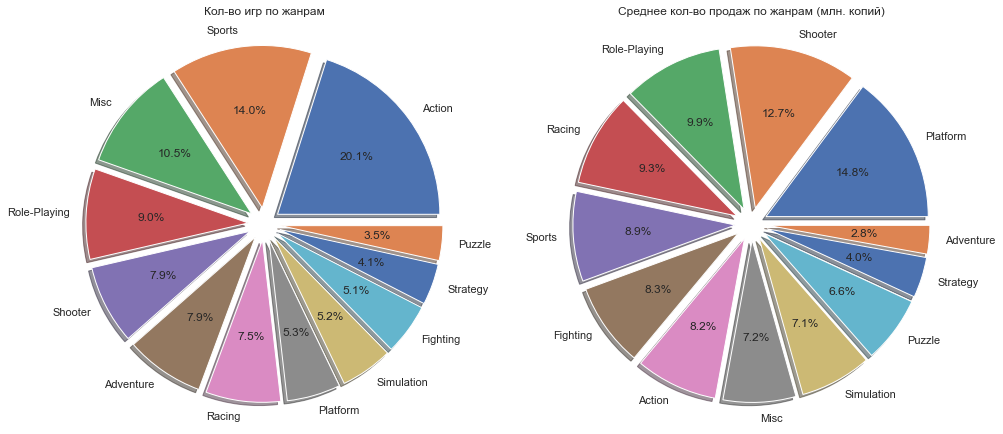

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
fig.autofmt_xdate();

labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ax1.set_title('Кол-во игр по жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  

ax2.set_title('Среднее кол-во продаж по жанрам (млн. копий)')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 

plt.show()

In [84]:
#games_genre_sales_pivot = games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'sum'])
#games_genre_sales_pivot.columns = ['games', 'total_sales']
#display(games_genre_sales_pivot.sort_values(by = 'total_sales', ascending = False))
games_genre_sales_pivot = games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'mean'])
games_genre_sales_pivot.columns = ['games', 'sales_mean']
display(games_genre_sales_pivot.sort_values(by = 'sales_mean', ascending = False))

,games,sales_mean
genre,,
Platform,878,0.940262
Shooter,1296,0.803519
Role-Playing,1481,0.628683
Racing,1226,0.590122
Sports,2306,0.567940
Fighting,837,0.528865
Action,3307,0.519057
Misc,1721,0.459204
Simulation,857,0.452695


Распределение игр по жанрам:
- тройка лидеров - Action(20,1%), Sports(14,0%) и Misc(10,5%); 
- аутсайдеры - Puzzle(3,5%), Strategy(4,1%) и Fighting(5,1%)

Распределение среднего количества проданных копий по жанрам:
- лидеры другие Platform(19,5%), Shooter(14,9%), Role-Playing(11,8);
- аутсайдеры Adventure(2,8%), Strategy(4,0%) и Puzzle(6,6%)

### Шаг 4. Портрет пользователя каждого региона 

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### 4.1 Самые популярные платформы в регионах (топ-5) 

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

In [85]:
top5_na_platform = games.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
print('ТОП5 Северной Америки')
display(top5_na_platform.head(5))

top5_eu_platform = games.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
print('______________________________')
print('ТОП5 Европы')
display(top5_eu_platform.head(5))

top5_jp_platform = games.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()
print('______________________________')
print('ТОП5 Японии')
display(top5_jp_platform.head(5))

ТОП5 Северной Америки


,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


______________________________
ТОП5 Европы


,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


______________________________
ТОП5 Японии


,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


А теперь посмотрим это все наглядно на графиках

In [86]:
top5_platform = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform[region] = games.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

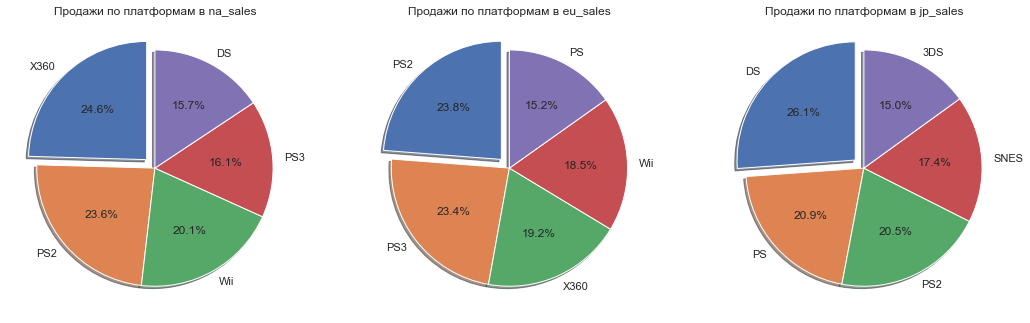

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.1, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top5_platform[region[i]].index
    sizes = top5_platform[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи по платформам в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    #ax.axis('equal')  

plt.show()

Платформы, на которых лидируют продажи во всех регионах разные:

- в Северной Америке - X360
- в Европе - PS2
- в Япония - DS

В Северной Америке и Европе из топ5 платформ входят одни и те же 4 платформы - X360, PS2, Wii, PS3. Исключение: в Северной Америке в топ5 входит DS, а в Европе PS. В Японии совсем другая картина: тут более популярны платформы DS, PS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

##### 4.2 Самые популярные жанры в регионах (топ-5) 

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)

In [88]:
top5_na_genre = games.groupby(['genre']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
print('ТОП5 Северной Америки')
display(top5_na_genre.head(5))

top5_eu_genre = games.groupby(['genre']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
print('______________________________')
print('ТОП5 Европы')
display(top5_eu_genre.head(5))

top5_jp_genre = games.groupby(['genre']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()
print('______________________________')
print('ТОП5 Японии')
display(top5_jp_genre.head(5))

ТОП5 Северной Америки


,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


______________________________
ТОП5 Европы


,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


______________________________
ТОП5 Японии


,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


А теперь посмотрим это все наглядно на графиках

In [89]:
top5_genre = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_genre[region] = games.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

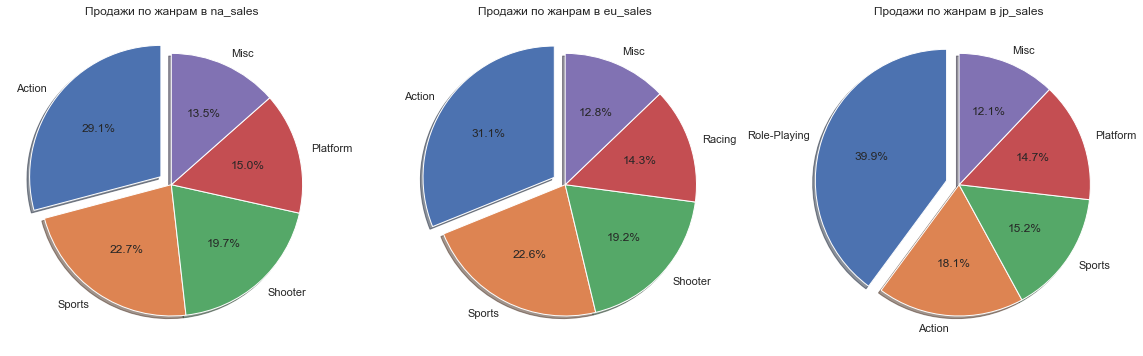

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.1, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top5_genre[region[i]].index
    sizes = top5_genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи по жанрам в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    #ax.axis('equal')  

plt.show();

В Северной Америке и Европе совпадают топ3 жанра с самыми высокими продажами:  Action, Sports и Shoter. А также совпадает на 5 месте жанр Misc. Надо отметиьть, что жанр Misc на 5 месте по продажам и в Японии. Различия: в Северной Америке на 4 месте жанр Platform, а в Европе - Racing. Такое совпадение можно объяснить общей культурой, менталитетом и, конечно же, языками - английский, испанский, французский, итальянский.

В Японии совсем другая культура и язык. Подавляющее жителей в Японии говорят только на японском. Этим можно объяснить почему в Японии лидирует жанр Role-Playing. Однако в Японии как и в  Америке и Европе тоже очень популярны Action и Sports.  В топ5 присутствует жанр Platform как и в Америке на 4 месте.

##### 4.3 Влияние рейтинга ESRB на продажи в отдельных регионах 

Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе

In [91]:
esrb_sales = games.groupby('rating').agg({'na_sales' :'sum', 'eu_sales' :'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
print('Влияние рейтинга ESRB на продажи')
display(esrb_sales)

Влияние рейтинга ESRB на продажи


,rating,na_sales,eu_sales,jp_sales
0,E,1325.84,727.27,211.62
1,no_rating,1120.75,546.83,800.25
2,T,773.24,439.42,163.16
3,M,760.72,495.05,67.37
4,E10+,357.57,190.39,48.24
5,EC,2.04,0.11,0.00
6,AO,1.26,0.61,0.00


А теперь посмотрим это все наглядно на графиках

In [92]:
top_rating = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_rating[region] = games.groupby('rating')[region].sum().sort_values(ascending=False).head(6)

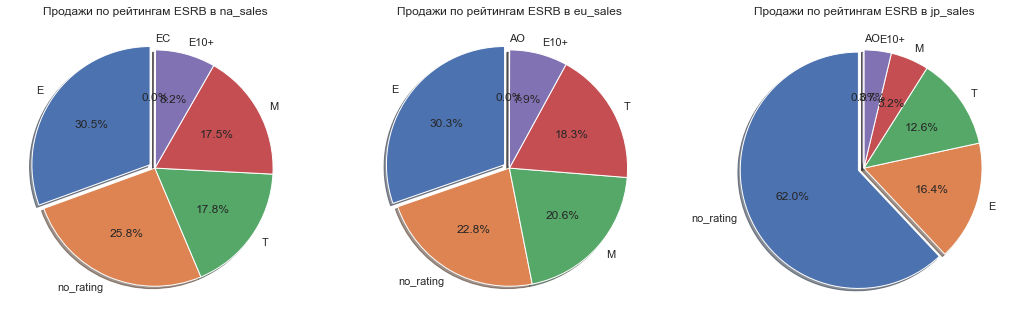

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.05, 0, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_rating[region[i]].index
    sizes = top_rating[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи по рейтингам ESRB в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    #ax.axis('equal')  

plt.show()

Ранее при при подготовке данных выяснили, что означают уникальные значения в столбце rating - рейтинг от ESRB:
 
«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

Из полученной таблице следует, что  продажи не всегда влияет рейтинг от ESRB. Прожажи игр без рейтинга в Северной Америке и Европе на втором месте, а в Японии на первом.  

На продажи влияют 4 основных рейтинга от ESRB: «E»,«T»,«M» и «E10+». Двух рейгингов «EC»,«AO» влияние на продажи минимальны, поэтому учитывать их в анализе нет смысла. Влияние рейтинга от ESRB на продажи в разных регионах почти одинаково. На первом месте влияние рейтинга «E», далее «T», «M» и «E10+». Исключение Европа, где продажи с рейтингом «M» выше, чем с рейтингом «T».

Графики показали, что:
- в Северной Америке и Европе самая большая доля продаж игр с рейтингом «E» и составляет около 30% от всех продаж. На втором месте продажи игр без рейтинга 23%-26%. В Европе доли продаж игр с «T» и «M» примерно одинаковы и составляют около 17,5%. Также В Европе и Северной Америке доли продаж игр с «E10+» примерно одинаковы и составляют 8%-9%. 

- в Японии более половины продаж приходится на игры без рейтинга 62%. На втором месте игры с рейтингами «E» 16,4%, на третьем игры с рейтингом «T» - 12,6%. Далее идут игры с рейтингом «M» - 3,2%.

### Шаг 5. Проверка гипотез 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##### 5.1 Проверка гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Из анализа исключаем игры с отсутствием оценки в столбце оценка пользователей user_score и в столбце оценка критиков critic_score. Используем для анализа данные за актуальный период с 2012 года

In [94]:
games_with_2012 = (games_clear[games_clear['year_of_release'] >= 2012])
display(games_with_2012.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Сформируем списки пользовательских рейтингов для обоих платформ Xbox One и PC

In [95]:
platform_xone = games_with_2012.query(' platform == "XOne" ')['user_score'].to_list()
platform_pc = games_with_2012.query(' platform == "PC" ')['user_score'].to_list()

Подсчитаем дисперсии, чтобы определиться с параметром equal_var

In [96]:
print('Дисперсия рейтинга пользователей на платформе XOne =', np.var(platform_xone))
print('Дисперсия рейтинга пользователей на платформе PC =', np.var(platform_pc))

Дисперсия рейтинга пользователей на платформе XOne = 1.7855118457300279
Дисперсия рейтинга пользователей на платформе PC = 2.6741565100878666


Дисперсии различны (отличие около 50%), поэтому возьмем equal_var=False.

Так как нам не нужны сверх точные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

Формируем нулевую и альтернатвную гипотезу:

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различается.

In [97]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(platform_xone, platform_pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5926561176517491
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, а это значит, что средние пользовательские рейтинги платформ Xbox One и PC равны

##### 5.2 Проверка гипотезы

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем списки пользовательских рейтингов для обоих жанров Action и Sports

In [98]:
genre_action = games_with_2012.query(' genre == "Action" ')['user_score'].to_list()
genre_sports = games_with_2012.query(' genre == "Sports" ')['user_score'].to_list()

Подсчитаем дисперсии, чтобы определиться с параметром equal_var

In [99]:
print('Дисперсия рейтинга пользователей для жанра Action =', np.var(genre_action))
print('Дисперсия рейтинга пользователей для жанра Sports =', np.var(genre_sports))

Дисперсия рейтинга пользователей для жанра Action = 1.7476152584876543
Дисперсия рейтинга пользователей для жанра Sports = 1.9718042351994367


Дисперсии не сильно отличаются, поэтому возьмем equal_var=True.

Так как нам не нужны сверх точные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

Формируем нулевую и альтернатвную гипотезу:

H0: Средние пользовательские рейтинги жанров Action и Sports равны.

H1: Средние пользовательские рейтинги жанров Action и Sports различается.

In [100]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(genre_action, genre_sports, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.13633279873618e-16
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, а это значит, что cредние пользовательские рейтинги жанров Action и Sports различны

### Шаг 6. Общий вывод

#### 1. Выводы по изучению общей информации файла с данными

Изучение общей информации исторических данных о продажах по всему миру компьютерных игр показало, что:
- в таблице присутствуют данные с 1980 до 2016 года
- в таблице 16715 строк и 11 столбцов
- данные соответствуют описанию
- имееются нарушения стиля в названиях столбцов
- требуется в некоторых столбцах изменить тип данных
- плафтформы и жанры заполнены на первый взгляд корректно
- много пропущенных данных в столбцах c оценками и рейтингом Critic_Score, User_Score и Rating

#### 2. Выводы по подготовке данных

###### 2.1 Все названия столбцов приведены к нижнему регистру

###### 2.2 Выполнена подготовка данных в столбце name:
- две пропущенные записи удалены без ущерба распределениям по другим параметрам 
 
###### 2.3. Выполнена подготовка данных в столбце year_of_release:
- определили, что пропущенных значений в столбце year_of_release не много 1.61%. Пропущенных значений не много и эти данные не являются самыми важными для анализа. Данные с пропущенными значениями удалены; 
- тип данных float64 в столбце year_of_release заменен на int64

###### 2.4 Выполнена подготовка данных в столбце critic_score:
- пропущенные значения в столбце оценка критиков critic_score (51.31%) заполнили отрицательным рейтингом "-1". Нулевым рейтингом пропущенные значения заполнить нельзя, так как в данных имеется реальный нулевой рейтинг

###### 2.5 Выполнена подготовка данных в столбце user_score:
- определили, что в столбце оценка пользователей имеются значения "tbd". Выяснили, что аббревиатура 'tbd' означает to be determined, т.е. "будет определено". Это означает пропуски значений. Поэтому значения "tbd" заменили на NaN;
- далее пропущенные значения NaN в столбце оценка пользователей user_score заполнили отрицательным рейтингом "-1", так как в данных имеется реальный нулевой рейтинг
- тип данных object в столбце user_score надо заменить на float

###### 2.6 Выполнена подготовка данных в столбце rating:
- выяснили вожможные причины пропуска данных в столбце rating - рейтинг от ESRB.  До появления организации ESRB (16 сентября 1994 года) не было и рейтинга от ESRB. В более позднее время пропуски появлялись возможно при заполнении данных;
- выяснили, что означают уникальные значения в столбце rating - рейтинг от ESRB:
 
«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Первоначально "K-A" ("Kids to Adults").

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

- исходя из полученной информации, выполнили:

значение рейтинга "K-A" заменили на "Е"

часть пропущенных значений восстановлены на основании предположения, что одинаковые названия игр на разных платформах имеют один и тот же возрастной рейтинг

значение «RP» означает отсутствие рейтинга, поэтому сначала вместо «RP» поставили «NaN», а затем заменили все значения «NaN» на отсутствие рейтинга «no_rating»

##### 2.7 Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец таблицы

#### 3. Выводы по исследовательскому анализу данных

##### 3.1 Анализ количества игр по годам

Количество выпускаемых игр начало быстро рости с 1994 года. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик приходится на 2008-2009 года. На пике в 2008 году выпускалось 1427 игр. В последнии 5 лет выпускается около 500-650 игр в год.

##### 3.2 Анализ продаж по платформам

Выбрали шесть платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS. Эти платформы выбрали потому, что они имеют суммарные продажи копий от двух раз и больше, чем остальные.

Определили, что наиболее частый срок, за который появляются новые и исчезают старые платформы, ориентировочно 12 лет. Среднее же значение существования платформ около 7 лет.

##### 3.3 Прогноз продаж по платформам на 2017 год

Прогноз продаж по платформам на 2017 год проводили на основании исследования актуального периода 5 лет с 2012 года.

Исследование продаж по платформам показало, что:
- многие популярные платформы, такие как Wii, PS3, X360 прошли свой цикл развития 12 лет. Другие платформы PS2, DS, PSP закончили свое развитие еще раньше. Во все эти платформы вкладываться не стоит.
- есть две платформы PS4 и XOne, которые появились относительно недавно в 2013 году и до 2015 года года наблюдался рост популярности этих платформ у потребителя, а в 2016 был спад. Одновко их жизненный цикл еше не дошёл даже до середины, поэтому эти платформы необходимо развивать. На конец 2016 года это самые перспективные платформы.
- еще есть 3 платформы, которые появились пораньше: PSV, 3DS и WiiU. На конец 2016 года они находятся примерно на середине своего цикла развития. Однако с даты появления у этих платформ не наблюдалось значительного роста популярности. Эти платформы можно развивать, но вложения в эти платформы должны быть умеренными. Причем приоритет у WiiU и 3DS, так как у PSV более слабое развитие.
- необходимо обратить внимание еще на платформу PC. Она существуют уже очень долго и показывает не самую высокую, но стабильную популярность среди пользователей. От платформы PC тоже не стоит отказываться, а поддерживать ее развитие.

В ходе исследования определили топ 5 прибыльных платформ по количеству проданных копий за актуальный период с 2012 года по 2016 год: PS3, X360, PS4, 3DS, XOne. Можно предположить, что эти пять платформ будут потенциально прибыльными и в 2017 году.

##### 3.4 Глобальные продажи игр в разбивке по платформам

Исследование данных глабальных прожаж  топ 5 платформ за актуальный период с 2010 года по 2016 год показало:
- в данных много выбросов, медианные значения сильно отличаются от средних значений. Значения глобальных продаж по всем топ 6 платформам сильно скошены вправо
- большое количество выбросов (игр с очень высоким уровнем продаж) на платформе X360 сильно увеличивают суммарные продажи на этой платформе.
- медианные значения продаж у трех платформ XOne, PS3, PS4 находятся близко к уровню 0,21 млн. копий. На платформе X360 максимальное медианное значение продаж - 0.31 млн. копий, а на платформе 3DS минимальное медианное значение продаж - 0.11 млн. копий.

##### 3.5.1 Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

Выбирали из топ 5 платформ за последние 5 лет одну - PS3.

Анализ влияния на продажи внутри одной популярной платформы PS3 отзывов пользователей и критиков показал следующее:
- оценки критиков важны, однако зависимость продаж от них находится на уровне средней (коэффициент корреляции 0.428). Зависимость прямопропорцианальная - чем выше оценка, тем выше продажи 
- зависимость продаж от оценки пользователей слабая (коэффициент корреляции меньше - 0.1439). Зависимость также прямопропорцианальная 

##### 3.5.2 Соотношение продаж с другими платформами

Схожие тенденции зависимости продаж от оценки критиков и оценки пользователей наблюдаются как для платформы PS3 так и для остальных топ 5 платформ:
- Зависимость продаж от оценки критиков ближе к средней, но в разы выше чем зависимость продаж от оценки пользователей
- зависимости продаж от оценки пользователей на платформах PS4 и XOne нет. ООценка пользователей очень слабая влияют на прожажи на платформах PS3 и X360  
- зависимости продаж от оценки критиков прямопропорцианальные.Зависимость продаж от оценки пользователей на платформах PS4 и XOne имеют даже минимальную отрицательную корреляцию

##### 3.6 Распределение игр по жанрам

Исследование количества игр по жанрам показало, что:
- платформы, на которых лидируют продажи во всех регионах разные:в Северной Америке - X360, в Европе - PS2, в Япония - DS
- в Северной Америке и Европе из топ5 платформ входят одни и те же 4 платформы - X360, PS2, Wii, PS3. Исключение: в Северной Америке в топ 5 входит DS, а в Европе PS. 
- в Японии совсем другая картина: тут более популярны платформы DS, PS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.
- распределение игр по жанрам: тройка лидеров - Action(20,1%), Sports(14,0%) и Misc(10,5%); аутсайдеры - Puzzle(3,5%), Strategy(4,1%) и Fighting(5,1%)

Исследование распределения среднего количества проданных копий по жанрам, что:
- лидеры другие Platform(19,5%), Shooter(14,9%), Role-Playing(11,8);
- аутсайдеры Adventure(2,8%), Strategy(4,0%) и Puzzle(6,6%)

#### Шаг 4. Выводы по портрету пользователя каждого региона

##### 4.1 Самые популярные платформы в регионах (топ-5)

Платформы, на которых лидируют продажи во всех регионах разные: в Северной Америке - X360, в Европе - PS2, в Япония - DS.

В Северной Америке и Европе из топ5 платформ входят одни и те же 4 платформы - X360, PS2, Wii, PS3. 

Исключение: в Северной Америке в топ5 входит DS, а в Европе PS. В Японии совсем другая картина: тут более популярны платформы DS, PS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

##### 4.2 Самые популярные жанры в регионах (топ-5)

В Северной Америке и Европе совпадают топ3 жанра с самыми высокими продажами: Action, Sports и Shoter. А также совпадает на 5 месте жанр Misc. Надо отметить, что жанр Misc на 5 месте по продажам и в Японии. Различия: в Северной Америке на 4 месте жанр Platform, а в Европе - Racing. Такое совпадение можно объяснить общей культурой, менталитетом и, конечно же, языками - английский, испанский, французский, итальянский.

В Японии совсем другая культура и язык. Подавляющее жителей в Японии говорят только на японском. Этим можно объяснить почему в Японии лидирует жанр Role-Playing. Однако в Японии как и в Америке и Европе тоже очень популярны Action и Sports. В топ5 присутствует жанр Platform как и в Америке на 4 месте.

##### 4.3 Влияние рейтинга ESRB на продажи в отдельных регионах

Из проведенного анализа Влияние рейтинга ESRB на продажи в отдельных регионах следует, что:
- продажи не всегда влияет рейтинг от ESRB. Продажи игр без рейтинга в Северной Америке и Европе на втором месте, а в Японии на первом
- на продажи влияют 4 основных рейтинга от ESRB: «E»,«T»,«M» и «E10+»
- влияния на продажи двух рейгингов «EC»,«AO» минимальны, поэтому их можно не учитывать 
- влияние рейтинга от ESRB на продажи в разных регионах почти одинаково. На первом месте влияние рейтинга «E», далее «T», «M» и «E10+». Исключение Европа, где продажи с рейтингом «M» выше, чем с рейтингом «T»
- в Северной Америке и Европе самая большая доля продаж игр с рейтингом «E» и составляет около 30% от всех продаж. На втором месте продажи игр без рейтинга 23%-26%. В Европе доли продаж игр с «T» и «M» примерно одинаковы и составляют около 17,5%. Также В Европе и Северной Америке доли продаж игр с «E10+» примерно одинаковы и составляют 8%-9%
- в Японии более половины продаж приходится на игры без рейтинга 62%. На втором месте игры с рейтингами «E» 16,4%, на третьем игры с рейтингом «T» - 12,6%. Далее идут игры с рейтингом «M» - 3,2%

#### Шаг 5. Выводы по проверке гипотез

##### 5.1 Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC равны

##### 5.2 Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports различны